# TRABAJO PRÁCTICO 3 - MIGUEL VALDÉS


In [2]:
import numpy as np
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt 
import sounddevice as sd
import soundfile as sf

## 1. Convolución discreta

Una señal finita de N muestras se escribe como  un vector 

$$x =
\begin{bmatrix}
x[0]\\
x[1]\\
\vdots\\
x[N-1]
\end{bmatrix}\in\mathbb{C}^{N}$$

Usando la convolución circular, un operador lineal y homogénemo en el tiempo se puede expresar como:

$$y = x \circledast h = C_{h}^{o}x$$,

Donde $C_{h}^{0}\in\mathcal{M}_{\mathbb{C}}(N,N)$ es una matriz de convolución parametrizada por el vector $h$, la respuesta impulsional del filtro.

Debido a los efectos de borde, la convolución circular $\circledast$ es poco utilizada en algoritmos de la vida real. Se ocupa en su reemplazo la convolución discreta donde las dos señales "rellenadas" (*padding*) con ceros fuera del intervalo de muestreo:

$$\begin{eqnarray}
\tilde{x}[n] = 
\lbrace\begin{array}
\\
x[n] & \text{si } 0\leq n \leq N\\
0 & \text{si no}
\end{array}\\
\tilde{h}[n] = 
\lbrace\begin{array}
\\
h[n] & \text{si } 0\leq n \leq N\\
0 & \text{si no}
\end{array}
\end{eqnarray}$$

donde $\tilde{x},\tilde{h}\in\mathbb{C}^{2N-1}$. Escribimos luego,

$$y = x\star h= C_{h}x$$
para $C_{h}\in\mathcal{M}_{\mathbb{C}}(2N-1,N)$.

**1.-** Dada una respuesta impulsional $h$, escriba las matrices $C_{h}$ y $C_{n}^{0}$. Pruebe que $C_{h}$ es una matriz de Toeplitz y $C_{h}^{o}$ es una matriz circulante.

### Solución:

Consideraremos una matriz de respuesta impulsional

$$h = 
\begin{bmatrix}
h[0]\\
h[1]\\
\vdots \\
h[N-1]
\end{bmatrix}$$

En primero lugar, para encontrar la matriz $C_{h}^{o}$ deberíamos tener por la definición de convolución circular para alguna señal finita $x$ de $N$ muestras la siguiente igualdad 

$$C_{h}^{o} x = 
\begin{bmatrix}
x[0]h[0] + x[1]h[N-1] + \cdots + x[N-1]h[1]\\
x[0]h[1] + x[1]h[0] + \cdots + x[N-1]h[2]\\
\vdots \\
x[0]h[N-1] + x[1]h[N-2] + \cdots + x[N-1]h[0]
\end{bmatrix}
$$

y por consecuencia debemos tener 

$$C_{h}^{o} = 
\begin{bmatrix}
h[0] & h[N-1] & \cdots & h[1]\\
h[1] & h[0] & \cdots & h[2] \\
\vdots & \vdots & \ddots & \cdots \\
h[N-1] & h[N-2] & \cdots & h[0]
\end{bmatrix}_{N\times N}
$$

Luego, fácilmente por el arreglo/definición establecida observamos

$$C_{h} = 
\begin{bmatrix}
h[0] & 0 & 0 & \cdots & 0 \\
h[1] & h[0] & 0 & \dots & 0\\
h[2] & h[1] & h[0] & \cdots & 0\\
\vdots & \vdots\ddots & \vdots\ddots & \vdots\ddots & 0\\
h[N-1] & \cdots & h[2] & h[1] & h[0]\\
0 & h[N-1] & \cdots & h[2] & h[1]\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & h[N-1]
\end{bmatrix}_{2N-1\times N}
$$

Ahora note que $C_{h}^{0}$ posee en sus filas solo permutaciones de los elemntos $\lbrace h[0],h[1],...,h[N-1]\rbrace$, identificándose como una matriz circulante. Por otro lado, observamos que los elementos de las diagonales en la matriz $C_{h}$ son exactamente iguales. Esto nos indica que $C_{h}$ se trata de una matriz de Toeplitz.

## 2.  Transformadas de Fourier discreta (DFT) y rápida (FFT)

La DFT es un operador lineal que se puede representar como una matriz $F_{N} = [e_{0},e_1,...,e_{N-1}]^{T}\in \mathcal{M}_{\mathbb{C}}(N,N)$ donde $e_{k}\in \mathbb{C}^{N}$ es la $k$-ésima función de la base de Fourier:

$$(F_{N})_{k,p} = e_{k}[p] = e^{i\dfrac{2\pi (p-1)}{N}(k-1)}$$

#### 2.1 Funciones básicas y transformada discreta de Fourier (DFT)

**1.-** Calcule las funciones de base de Fourier $e_{k}$ para todos los índices $k$ para una señal de tamaño $N=32$. Trazar sus partes reales e imaginarias en una figura.

Note que la matriz de Fourier de forma explícita tiene la siguiente forma

$$F_{N} =\left(
\begin{matrix}
1 & 1 & 1 & \cdots & 1\\
1 & e^{i\frac{2\pi}{N}} & e^{i\frac{4\pi}{N}} & \cdots & e^{i\frac{2\pi (N-1)}{N}}\\
1 & e^{i\frac{4\pi}{N}} & \ddots & \cdots & e^{i\frac{4\pi (N-1)}{N}}\\
\vdots & \vdots & \vdots & \cdots & \vdots\\
1 & e^{i\frac{2\pi (N-1)}{N}} & e^{i\frac{4\pi (N-1)}{N}} & \cdots & e^{i\frac{2\pi (N-1)(N-1)}{N}}
\end{matrix}
\right)
$$

Entonces ahora, para N=32 calcularemos las funciones de la base de Fourier.

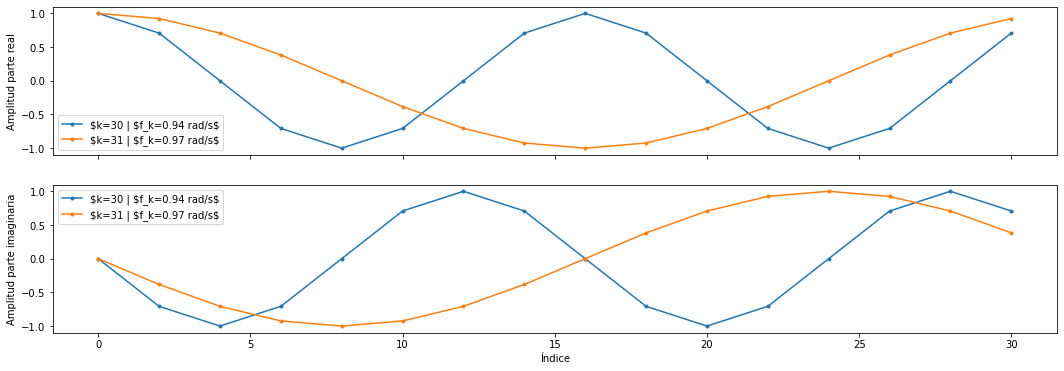

In [3]:
N = 32
fig,axes = plt.subplots(2,1,figsize=(18,6),sharex=True)
t = np.arange(0,N,2)

for k in range (N-2,N):
    fk = k/N
    wk = 2*np.pi*fk
    ek = np.exp(1j*wk*t)
    o1 = axes[0].plot(t,np.real(ek),'.-',label=f'$k={k} | $f_k={fk:.2f} rad/s$')
    o2 = axes[1].plot(t,np.imag(ek),'.-',label=f'$k={k} | $f_k={fk:.2f} rad/s$')
    
axes[0].legend();
axes[0].set_ylabel('Amplitud parte real');
axes[1].legend();
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('Amplitud parte imaginaria');



**2.-** Calcule $F_N$ la matriz de transformada discreta de Fourier (DFT) para N = 1,2,4 Y 32. Para N=32 visualícela las partes realees e imaginarias como una imágen. ¿Qué contienen las líneas de la matriz $F_N$?

In [4]:
def FN(N):
    F_N = np.zeros(shape=(N,N),dtype=np.complex128)
    omegaN = np.exp(1j*2*np.pi/N)
    for i in range(N):
        for j in range(N):
            F_N[i,j]=omegaN**(i*j)
    return F_N

for N in [1,2,4,32]:
    print('La matriz de Transformada Discreta de Fourier para N =',N,'es:')
    F_N = FN(N)
    print(F_N)


La matriz de Transformada Discreta de Fourier para N = 1 es:
[[1.+0.j]]
La matriz de Transformada Discreta de Fourier para N = 2 es:
[[ 1.+0.0000000e+00j  1.+0.0000000e+00j]
 [ 1.+0.0000000e+00j -1.+1.2246468e-16j]]
La matriz de Transformada Discreta de Fourier para N = 4 es:
[[ 1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17+1.0000000e+00j
  -1.0000000e+00+1.2246468e-16j -1.8369702e-16-1.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j -1.0000000e+00+1.2246468e-16j
   1.0000000e+00-2.4492936e-16j -1.0000000e+00+3.6739404e-16j]
 [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16-1.0000000e+00j
  -1.0000000e+00+3.6739404e-16j  5.5109106e-16+1.0000000e+00j]]
La matriz de Transformada Discreta de Fourier para N = 32 es:
[[ 1.        +0.j          1.        +0.j          1.        +0.j
  ...  1.        +0.j          1.        +0.j
   1.        +0.j        ]
 [ 1.        +0.j    

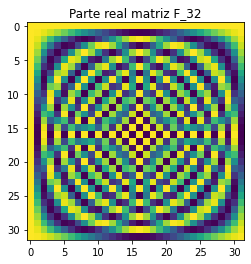

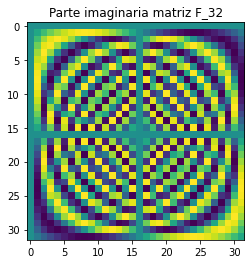

In [5]:
#Para N=32, veamos la parte real e imaginaria de la DFT
plt.figure()
plt.title("Parte real matriz F_32")
pl.imshow(np.real(FN(32)));

plt.figure()
plt.title("Parte imaginaria matriz F_32")
pl.imshow(np.imag(FN(32)));

**3.-** Para una señal de largo $N=1024$ tal que

$$x[n] = \cos (2\pi f_{0}n)$$

con $f_{0} = \frac{k}{N}$ para $k<\frac{N}{2}$ un entero positivo, calcule la matriz $F_{N}$ y aplíquela a la señal $x$. Visualice luego la magnitud del resultado en el dominio frecuencial.



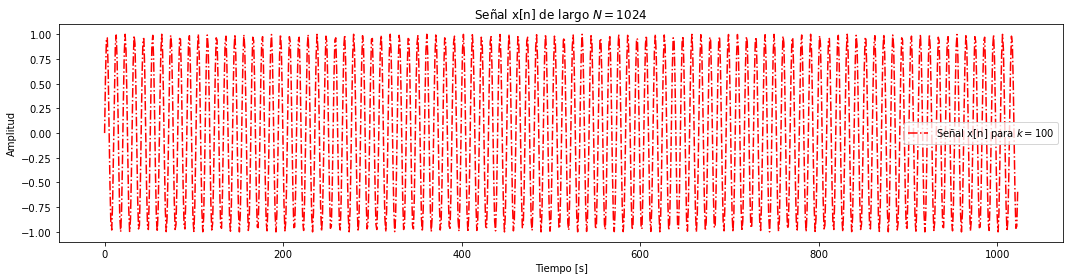

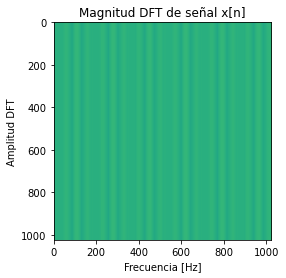

In [6]:
def getxHat(N,k):
    f0=k/N
    w0=2*np.pi*f0
    t=np.arange(0,N,1)
    x=np.sin(w0*t)
    # Gráfico de la señal
    plt.figure(figsize = (18,4))
    plt.plot(t,x,"r-.",label = f'Señal x[n] para $k = {k}$')
    plt.title(f'Señal x[n] de largo $N = {N}$')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend()
    # Matriz Discreta de Fourier 
    FN_1024=FN(1024)
    # Transformada discreta de Fourier de x
    xhat=FN_1024*np.transpose(x)
    # Gráfico de Magnitud
    plt.figure()
    plt.title('Magnitud DFT de señal x[n]')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud DFT')
    pl.imshow(np.abs(xhat));
    return x,xhat

getxHat(1024,100);

**4.-** Cambie $f_0$ a un valor grande tal que $k>N$. ¿Qué sucede con el espectro?.

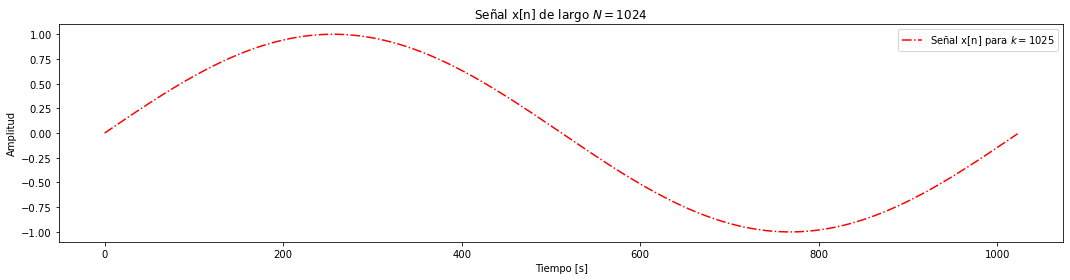

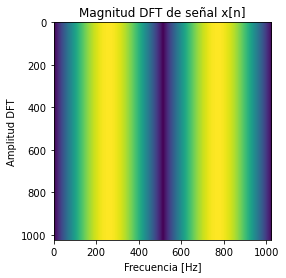

In [10]:
getxHat(1024,1025);

### 2.2 Transformada rápida de Fourier (FFT)
**1.-** Mida el tiempo de cálculo de la DFT con y sin el cálculo previo de la matriz de Fourier $F_N$ para $N =1024$



**2.-** Usando el método np.fft.fft mida el tiempo del cálculo de la FFT de la misma señal y compárelo con los dos tiempos anteriores.

**3.-** Calcule y almacene el tiempo computacional de la DFT, DFT con la matriz precalculada y la FFT para $N= 2k$ muestreados logarítmicamente de $k=2$ a $k=12$. Trace un gráfico log vs log con los diferentes tiempos compuacionales en función de N. Discuta lo observado.

### 3.- Interpretación de las señales

Para todas las señales que se describen a continuación, siga los siguientes pasos:

1. Cargue la señal en la memoria y almacene tanto la señal $x$ como la frecuencia de muestreo $f_s$
2. Trace la señal en el tiempo con el eje $x$ adecuado
3. Grafique la magnitud de la señal FFT con la frecuencoia real correspondiente centrada en 0.
4. Interprete y discuta las propiedades de la señal en frecuencia utilizando la información proporcionada sobre cada señal en las descripciones a continuación. Cuando sea posible, recupere parámetros físicos como la constante de tiempo de las frecuencias fundamentales de las señales. Puede hacer zoom en parte de un gráfico utilizando pl.xlim([xmin,xmax]).

### 4.- Filtraje Digital
En esta sección estudiaremos varios filtros digitales y los aplicaremos a las señales.

#### 4.1 Filtraje Ideal
1. Cargue la señal en el archivo "stairwayb.wav". Intentaremos atenuar el ruido presente en el audio cortando toda la banda de frecuencia donde hay ruido
2. Calcule la FFT de la señal y grafique su magnitud en el dominio de Fourier. Seleccione una frecuencia de corte $f_c$ para un filtro de paso bajo ideal
3. Aplique un filtro ideal "low-pass" con una frecuencia de corte $f_c$. Escuche la señal filtrada. Tenga en cuenta que al guardar un archivo wav en formato flotante recorta los valores entre -1 y 1, por lo que la señal se debe escalar correctamente para evitar la saturación.
4. Utilice un filtro ideal para seleccionar solo la nota con la frecuencia mas baja en la señal "seq.wav". Escuche la señal filtrada para comprobar que solo queda una nota.
5. Calcule la transformada de Fourier inversa de la respuesta de frecuencia ideal del filtro de paso bajo para obtener su respuesta de impulso de convolución circular. Haga lo mismo con el filtro de paso alto ideal. Compruebe ambos que la frecuencia 0 se pasa y se corta respectivamente calculando la ganancia estática.

In [20]:
#samplerate, data = sp.io.wavfile.read('C:\Users\mvald\Documents\Universidad\Github\TP_FMPS\TP 3')
stairway, samplerate = sf.read('TP2_stairwayb.wav') 
fft_stairway = np.fft.fft(stairway)

array([-12.75765991+0.j        ,   2.13658386+3.01390339j,
         0.11935426-3.32237102j, ...,  -0.35955117+0.88621497j,
         0.11935426+3.32237102j,   2.13658386-3.01390339j])

#### 4.2 Diseño de filtros digitales
En aplicaciones de la "vida real", a menudo es necesario diseñar filtros causales. Esto se hace estimando coeficientes de un filtro FIR o IIR, de orden finito, que aproxima sistemas de tiempo continuo como los filtros de Butterworth de Chebychev.

1. Calcule los coeficientes de un filtro Butterworth FIR discreto para una frecuencia de corte normalizada de $f_c=0.2$ (para una frecuencia de muestreo de 1) de orden n=2.
2. Implemente una función $def freqResp(a,b,f)$ que devuelve la respuesta de la frecuencia a un filtro IIR $a,b$ para obtener una lista de frecuencias $f$. GRafique la respuesta de frecuencia para el filtro Butterworth de órdenes n=1,2,3,4.
3. Aplique el filtro a la señal "stairway.wav". ¿Cuál es el equivalente frecuencia de corte en Hz? ¿En qué orden el filtro es lo suficientemente fuerte como para atenuar bien el ruido?
4. Calcule los coeficientes de un filtro Chebychev FIR discreto de tipo 1 para una frecuencia de corte normalizada de $f_c=0.2$ (para una frecuencia de muestreo de 1), de orden $n=2$ y permitiendo ondulaciones de 1 dB de paso de banda. GRafique la respuesta de frecuencia de ambos filtros Butterworth y Chebychev del mismo orden en el miso gráfico.
5. APlique el filtro de Chebychev a la señal con ruido "stairway.wav".¿Qué sucede con un orden de $n=50$? ¿Ocurre lo mismo con el filtro Butterworth de igual orden?